<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [2]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([5.36793206, 2.36033582, 1.83527871, 6.69969473, 6.42564101,
       5.41258151, 3.34981295, 6.54087167, 3.27730548, 7.34507931])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

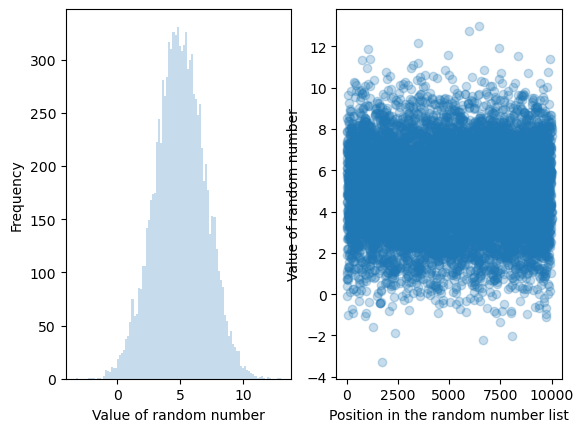

In [7]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [12]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.37%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [ ]:

# Your code here


### 1.2 The simulation

In [13]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [14]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

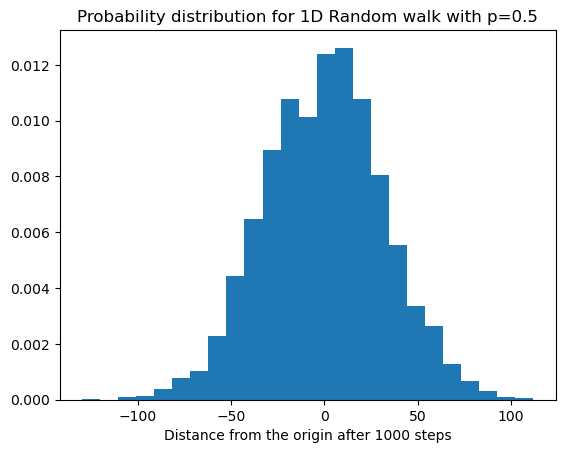

In [19]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins = 25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [20]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

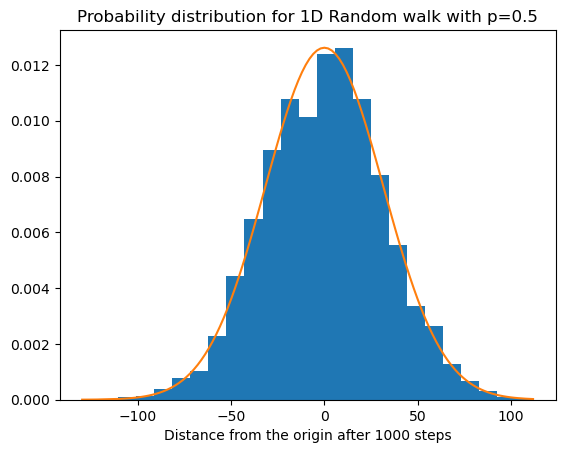

In [23]:
prob_right = 0.5
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
plt.hist(results, bins = 25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \($\pi$\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [24]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13892

### 2.3 A better solution

In [25]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.141632

### 2.4 A smarter solution

In [37]:
x = rnd.uniform(low=-1, high=1, size=1)
print(x)

[-0.77656495]


In [38]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.145188

## Exercise 1 :  Vital Stats of Random π

In [ ]:
for _ in range(10**z):

In [66]:
def estimate_pi(n):
    x = rnd.rand(n)
    y = rnd.rand(n)
    green = np.sum((x**2 + y**2) <= 1 )
    return 4 * (green / n)
cool = []
for i in range (100):
    cool.append(estimate_pi(100000))
print(np.mean(cool))
print(np.std(cool))

3.141595600000001
0.005114459173754363


In [92]:
x_value = [10, 100, 1000, 10000, 100000, 1000000]
y_value = []
std = []
for _ in x_value:
    cool = []
    for i in range (100):
        cool.append(estimate_pi(_))
    y_value.append(np.mean(cool))
    std.append(np.std(cool))
print(y_value)
print(std)

[3.1120000000000005, 3.1260000000000003, 3.1430800000000003, 3.140759999999999, 3.1407567999999992, 3.14147488]
[0.5293921042101025, 0.17030560765870278, 0.055850815571484747, 0.015615120876893674, 0.005218700773180996, 0.0016248074918586573]


In [82]:
print(np.pi)
pi = []
for x in range(6):
    pi.append(np.pi)
print(pi)

3.141592653589793
[3.141592653589793, 3.141592653589793, 3.141592653589793, 3.141592653589793, 3.141592653589793, 3.141592653589793]


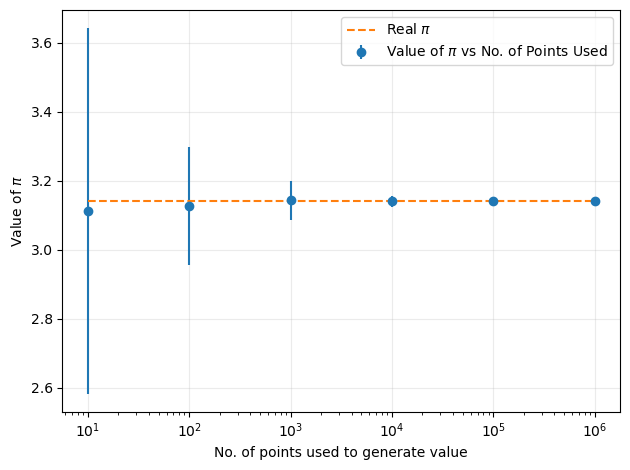

In [128]:
plt.errorbar(x_value, y_value, yerr=std, xerr = None, fmt = 'o', label = r'Value of $\pi$ vs No. of Points Used')
plt.xscale('log')
plt.xlabel('No. of points used to generate value')
plt.ylabel(r'Value of $\pi$')
plt.grid(alpha = 0.25)
plt.legend('Std. Dev. of pi')
plt.plot(x_value, pi, '--', label = r'Real $\pi$')
plt.legend(loc = 'upper right')
plt.tight_layout()

In [64]:
def estimate_pi(n):
    x = rnd.rand(n)
    y = rnd.rand(n)
    green = np.sum((x**2 + y**2) <= 1 )
    return 4 * (green / n)

store = []
for z in range(6):
    for _ in range (100):
        a = 10**z
        store.append(estimate_pi(a))
print(store)

[4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.8, 2.8, 4.0, 4.0, 3.6, 3.6, 3.2, 2.8, 2.0, 3.2, 2.4, 2.4, 3.2, 3.6, 2.8, 4.0, 4.0, 2.8, 3.2, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.2, 4.0, 3.6, 3.6, 3.6, 2.8, 3.6, 3.2, 3.6, 3.2, 2.4, 2.4, 2.8, 3.2, 3.6, 2.8, 2.8, 4.0, 3.2, 4.0, 2.4, 2.0, 3.2, 3.2, 3.6, 2.8, 4.0, 3.2, 4.0, 2.8, 2.8, 3.6, 4.0, 3.2, 3.6, 2.4, 2.4, 2.8, 4.0, 3.6, 3.2, 3.6, 3.6, 2.8, 3.6, 3.2, 2.8, 3.2, 4.0, 3.2, 2.8, 2.0, 2.8, 3.6, 2.4, 2.4, 3.6, 2.8, 2.8, 2.4, 3.2, 3.2, 3.2, 2.8, 3.6, 3.2, 3.2, 3.6, 2.0, 3.2, 2.0, 3.2, 4.0, 2.8, 3.2,